Problem statement:Classification of term deposit in bank based the bank marketing campaign variables.

These are the libraries which are used for the preprocessing,features engineering, and building a model.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.simplefilter("ignore")

Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

Source:
Dataworld
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Attribute Descriptions
age: (numeric)

job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

education: (categorical: primary, secondary, tertiary and unknown)

default: has credit in default? (categorical: 'no','yes','unknown')

housing: has housing loan? (categorical: 'no','yes','unknown')

loan: has personal loan? (categorical: 'no','yes','unknown')

balance: Balance of the individual.

contact: contact communication type (categorical: 'cellular','telephone')

month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

day: last contact day of the month (numeric: 1,2,3,....29,30)

duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

deposit - has the client subscribed a term deposit? (binary: 'yes','no')

In [73]:
df=pd.read_csv(r"D:\data\datasets_4471_6849_bank.csv")

In [74]:
bank=df.copy()

In [75]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [76]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Didnt find any missing values in the data

In [77]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [78]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Looking at statistics pdays is skewed data.

In [79]:
bank.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [80]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [81]:
bank.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

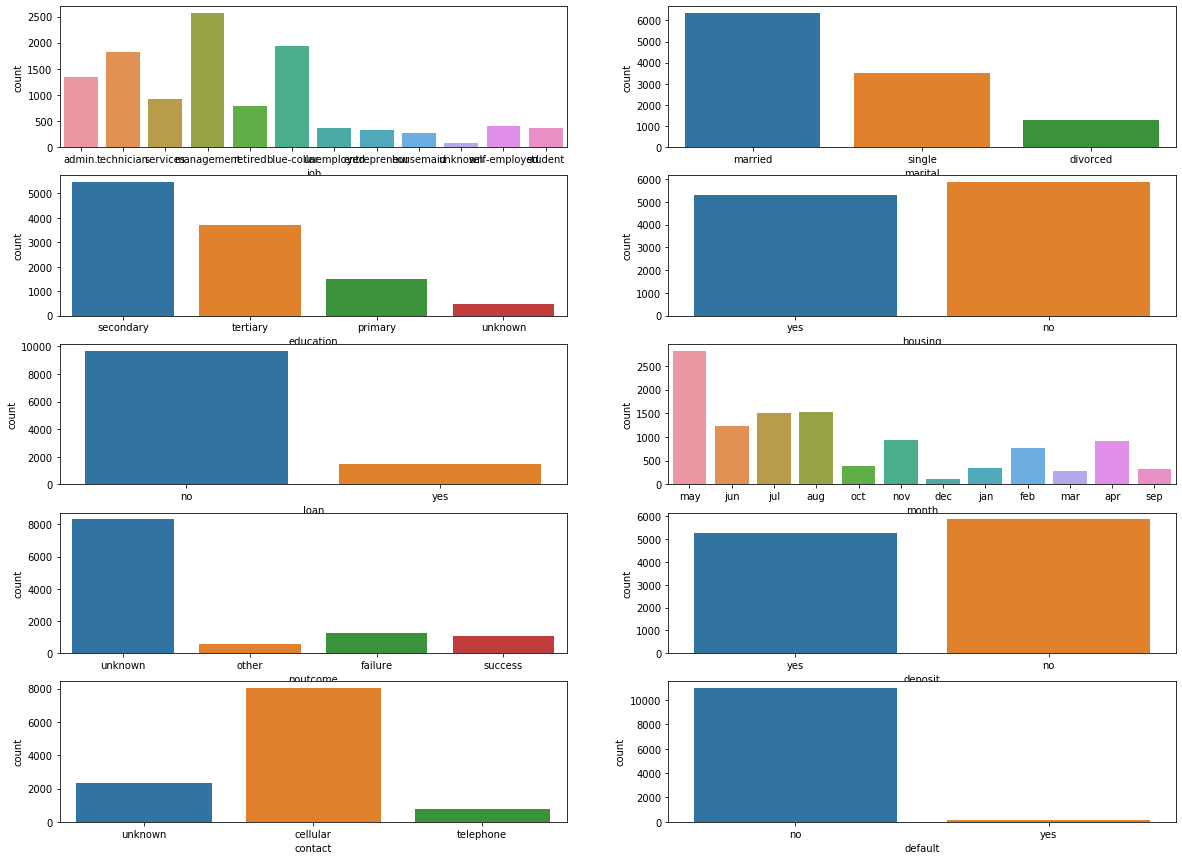

In [82]:
cat_col=['job','marital','education','housing','loan','month','poutcome','deposit','contact','default']
plt.figure(figsize=(20,15))
i=0
for name in cat_col:
    i=i+1
    plt.subplot(5,2,i)
    sns.countplot(name,data=bank)
plt.show()

There is an unknown category in three variables. Is that a missing value? Lets see.

In [83]:
bank.replace('unknown',np.NaN,inplace=True)

In [84]:
percent_missing=(bank.isnull().sum()/len(bank))*100
percent_missing

age           0.000000
job           0.627128
marital       0.000000
education     4.452607
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      21.017739
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     74.592367
deposit       0.000000
dtype: float64

As I considered unknown values as missing, percentage of missing values in poutcome is much higher while remaining are low.
poutcome is impossible to fill the missing values.

In [85]:
job_mode=bank['job'].mode()
bank['job'].fillna(value=job_mode.iloc[0],inplace=True)
edu_mode=bank['education'].mode()
bank['education'].fillna(value=edu_mode.iloc[0],inplace=True)
cnt_mode=bank['contact'].mode()
bank['contact'].fillna(value=cnt_mode.iloc[0],inplace=True)

In [86]:
bank['poutcome'].replace(np.NaN,'unknown',inplace=True)

In [87]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

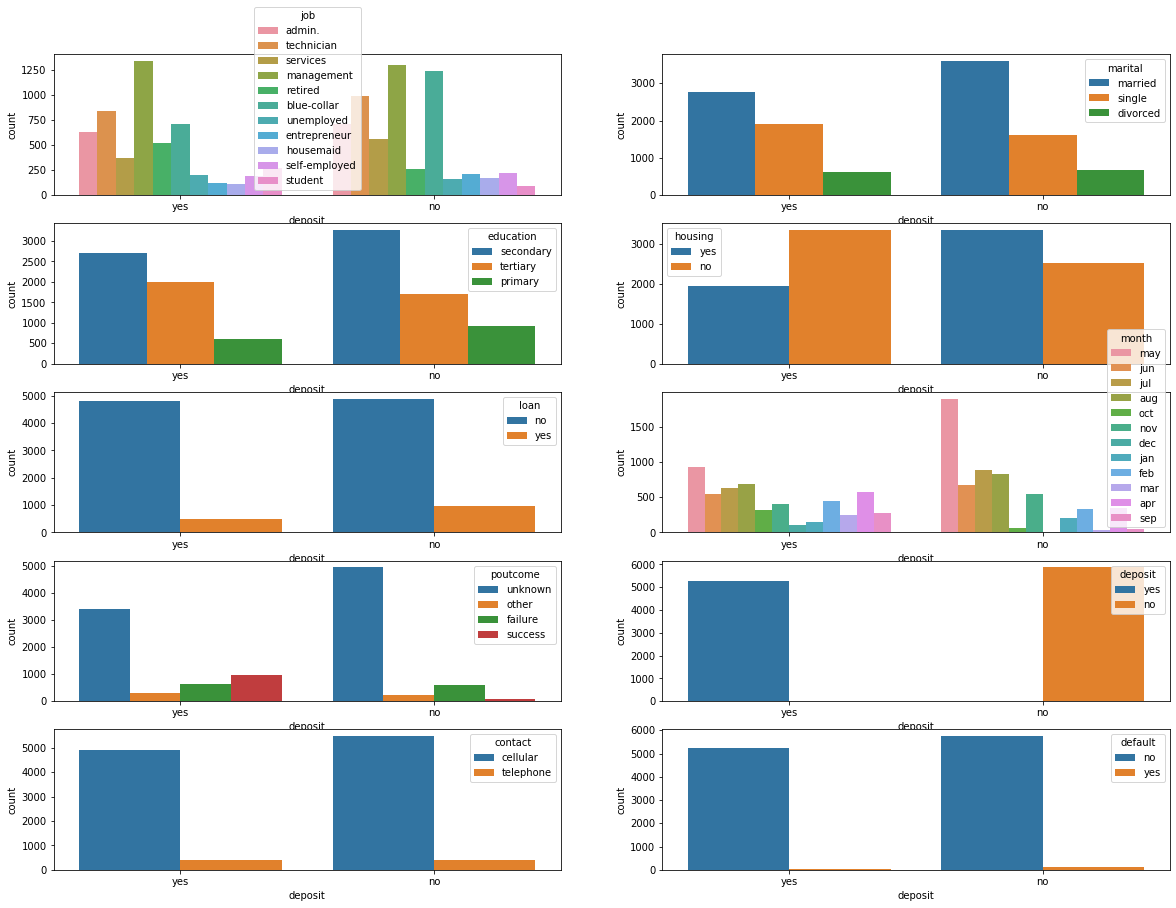

In [88]:
plt.figure(figsize=(20,15))
i=0
for name in cat_col:
    i=i+1
    plt.subplot(5,2,i)
    sns.countplot(x='deposit',hue=name,data=bank)
plt.show()

Majority of singles showed interest in term deposit comparing with married.

Tertiary educated people invested more than seconday educated.

Around 50% folks without loan deposited their money in term deposit.

In [89]:
bank.drop(['poutcome'],axis=1,inplace=True)



Outlier treating

In [90]:
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

I defined a functions to change extrem values.

Numpy.logical_or() in Python:
This is a logical function and it helps user to find out the truth value of arr1 OR arr2 element-wise. Both the arrays must be of same shape.

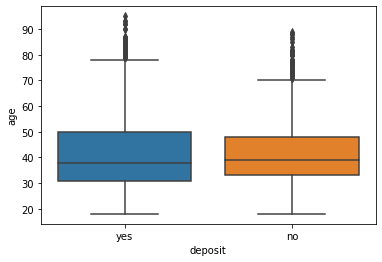

In [91]:
sns.boxplot(x='deposit', y='age', data=bank)

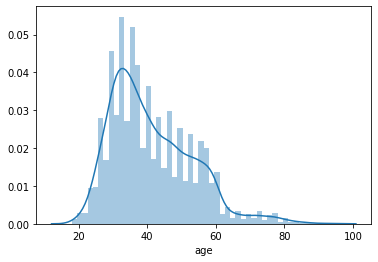

In [92]:
sns.distplot(bank['age'])

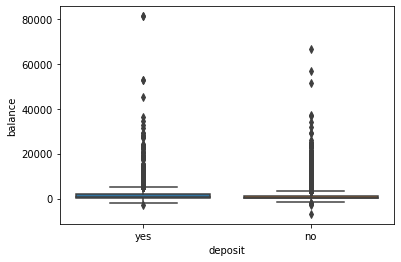

In [93]:
sns.boxplot(x='deposit', y='balance', data=bank)

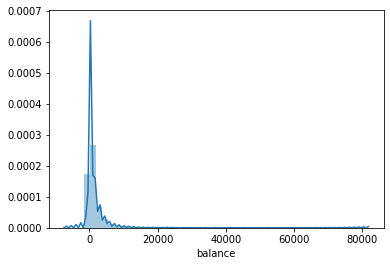

In [94]:
sns.distplot(bank['balance'])

In [95]:
bank1 = bank
min_val = bank1["balance"].min()
max_val = 20000
bank1 = impute_outliers(df=bank1, column='balance' , minimum=min_val, maximum=max_val)

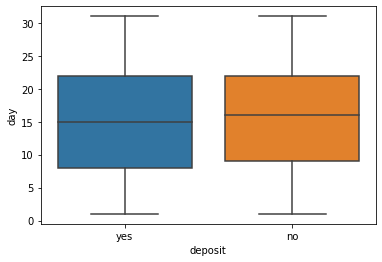

In [96]:
sns.boxplot(x='deposit', y='day', data=bank)

Didnt find any outliers in days column.

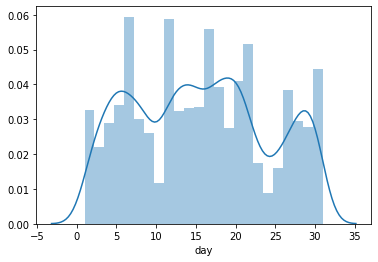

In [97]:
sns.distplot(bank['day'])

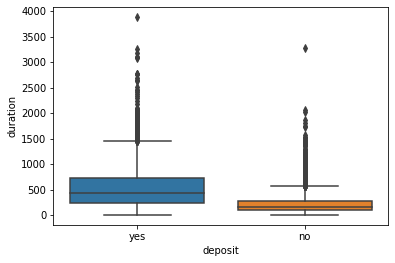

In [98]:
sns.boxplot(x='deposit', y='duration', data=bank)

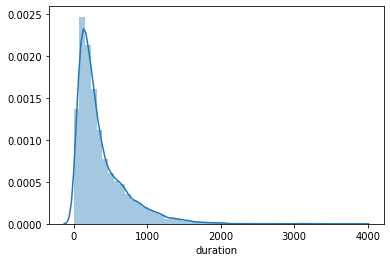

In [99]:
sns.distplot(bank['duration'])

In [100]:
min_val = bank1["duration"].min()
max_val = 2000
bank1 = impute_outliers(df=bank1, column='duration' , minimum=min_val, maximum=max_val)

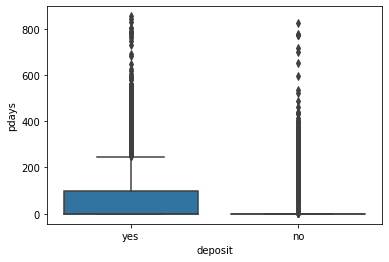

In [101]:
sns.boxplot(x='deposit', y='pdays', data=bank)

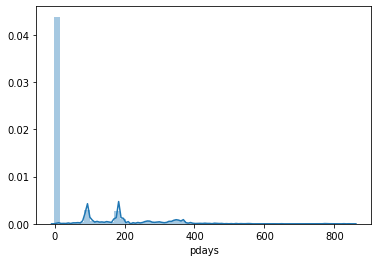

In [102]:
sns.distplot(bank['pdays'])

In [103]:
min_val = bank1["pdays"].min()
max_val = 300
bank1 = impute_outliers(df=bank1, column='pdays' , minimum=min_val, maximum=max_val)

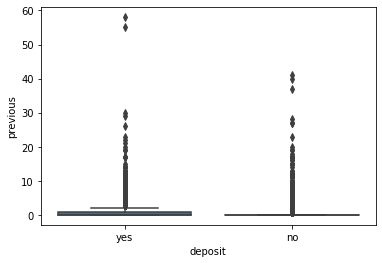

In [104]:
sns.boxplot(x='deposit', y='previous', data=bank)

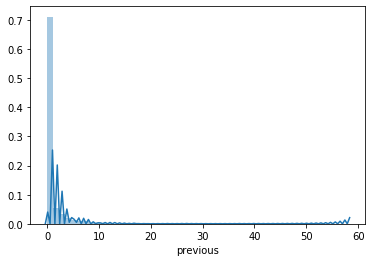

In [105]:
sns.distplot(bank['previous'])

In [106]:
min_val = bank1["previous"].min()
max_val = 13
bank1= impute_outliers(df=bank1, column='previous' , minimum=min_val, maximum=max_val)

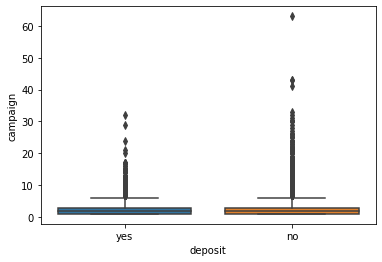

In [107]:
sns.boxplot(x='deposit', y='campaign', data=bank)

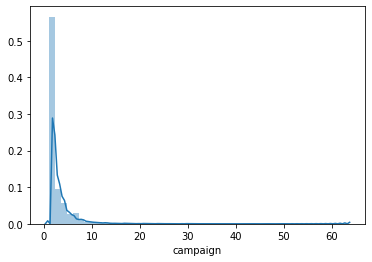

In [108]:
sns.distplot(bank['campaign'])

In [109]:
min_val = bank1["campaign"].min()
max_val = 20
bank = impute_outliers(df=bank1, column='campaign' , minimum=min_val, maximum=max_val)

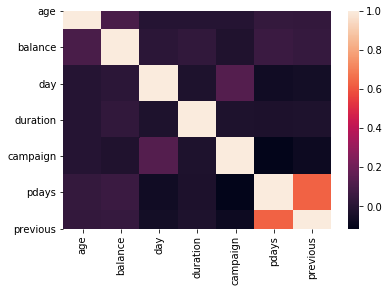

In [110]:
corr=bank.corr()
sns.heatmap(corr)

I didnt find any markabel correlation except between pdays and previous.


In [111]:
bank['deposit'] = bank['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

Changed the lables in target variable from Yes, No to numeric.

And divided the columns into numberic and categoric.

In [112]:
num = bank[['age','balance','day','duration','campaign','pdays','previous','deposit']]

In [113]:
cat = bank[['job','marital','education','housing','contact','month','default','loan']]

Used get dummies to change categorical columns to numerica.

In [114]:
dumm=pd.get_dummies(cat,drop_first=True)

In [115]:
dumm

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_yes,loan_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11158,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11159,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11160,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [116]:
data=num.join(dumm)
data.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_yes,loan_yes
0,59,2343.0,5,1042.0,1.0,-1.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,56,45.0,5,1467.0,1.0,-1.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,41,1270.0,5,1389.0,1.0,-1.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,55,2476.0,5,579.0,1.0,-1.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,54,184.0,5,673.0,2.0,-1.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Splited data into input and target variables and also into training and testing split.

In [117]:
X=data.drop('deposit',axis=1)
y=data['deposit']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30,random_state=42)

Applied Logistic regression to see how good is it classifing.


In [118]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred1=lr.predict(X_test)
pred_prob_log = lr.predict_proba(X_test)
lr.score(X_test,y_test)

C:\Users\Praveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8011346670647954

I have used confusion matrix to see how many are correct and incorrectly classified.

Confusion Matrix:
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.


In [121]:
confusion_matrix(y_test,pred1)

array([[1435,  307],
       [ 359, 1248]], dtype=int64)

Classification report to see accuracy, precision, recall and F1-score.

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [122]:
classification_report(y_test,pred1)

'              precision    recall  f1-score   support\n\n           0       0.80      0.82      0.81      1742\n           1       0.80      0.78      0.79      1607\n\n    accuracy                           0.80      3349\n   macro avg       0.80      0.80      0.80      3349\nweighted avg       0.80      0.80      0.80      3349\n'

Imported Random forest classifier and applied.

In [123]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)
pred_prob_rf = rfc.predict_proba(X_test)
rfc.score(X_test,y_test)

0.8321887130486713

In [124]:
confusion_matrix(y_test,predict)

array([[1410,  332],
       [ 230, 1377]], dtype=int64)

In [125]:
classification_report(y_test,predict)

'              precision    recall  f1-score   support\n\n           0       0.86      0.81      0.83      1742\n           1       0.81      0.86      0.83      1607\n\n    accuracy                           0.83      3349\n   macro avg       0.83      0.83      0.83      3349\nweighted avg       0.83      0.83      0.83      3349\n'

KNearest Neighbor classifier algorithm.

In [126]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred2 = knn.predict(X_test)
pred_prob_knn = knn.predict_proba(X_test)
knn.score(X_test, y_test)

0.7446999104210212

In [127]:
confusion_matrix(y_test,pred2)

array([[1318,  424],
       [ 431, 1176]], dtype=int64)

In [128]:
classification_report(y_test,pred2)

'              precision    recall  f1-score   support\n\n           0       0.75      0.76      0.76      1742\n           1       0.73      0.73      0.73      1607\n\n    accuracy                           0.74      3349\n   macro avg       0.74      0.74      0.74      3349\nweighted avg       0.74      0.74      0.74      3349\n'

In [129]:
fpr,tpr,thresholds=roc_curve(y_test,pred_prob_log[:,1])
fpr1,tpr1,thresholds1=roc_curve(y_test,pred_prob_rf[:,1])
fpr2,tpr2,thresholds2=roc_curve(y_test,pred_prob_knn[:,1])
roc_auc_log=roc_auc_score(y_test,pred1)
roc_auc_rf=roc_auc_score(y_test,predict)
roc_auc_knn=roc_auc_score(y_test,pred2)

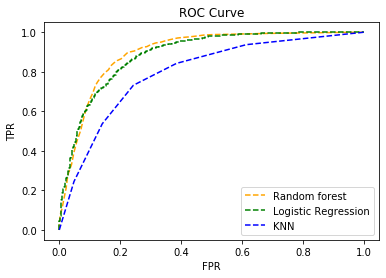

In [130]:
plt.figure()
plt.plot(fpr1,tpr1,label="Random forest",linestyle='--',color='orange')
plt.plot(fpr,tpr,label="Logistic Regression",linestyle='--',color='green')
plt.plot(fpr2,tpr2,label="KNN",linestyle='--',color='blue')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

From above ROC curve, I can say random forest classifier is performing better than remaining models.